In [2]:
import networkx as nx
from os import listdir
import glob
import numpy as np
import pandas as pd

In [105]:
path = "mass_data/less_than_1500_nodes"
data_paths = [x.replace("{}\\".format(path), "") for x in glob.glob("{}/*".format(path))]
lcc_prop = {}

for d_path in data_paths:
    print(d_path)
    if any(fname.endswith('.csv') for fname in  glob.glob('{}/{}/*'.format(path,d_path))):
        df = pd.read_csv('{}/{}/edges.csv'.format(path,d_path))
        G = nx.from_pandas_edgelist(df, "# source", " target")
        
    elif any(fname.endswith('.edgelist') for fname in glob.glob('{}/{}/*'.format(path,d_path))):
        G = nx.read_edgelist("{}/{}/edges.edgelist".format(path, d_path), nodetype=int)
        
    elif not any(fname.endswith('txt.gz') for fname in  glob.glob('{}/{}/*'.format(path,d_path))):
        G = nx.read_adjlist("{}/{}/edges.txt".format(path, d_path), nodetype=int)

    else:
        G = nx.read_adjlist(gzip.open('{}/{}/edges.txt.gz'.format(path,d_path)), nodetype=int)

    components = sorted(list(nx.connected_components(G)), key=len, reverse=True)
    lcc_prop[d_path] = len(components[0]) / np.sum([len(c) for c in components])

7th_graders
aves-weaver-social
bt.csv
contacts-prox-high-school-2013
contacts-prox-high-school-2013-attr
email_company
fb-messages
fb-pages-politician
fb-pages-tvshow
fb_friends.csv
high_tech_company
inf-euroroad
infect-dublin
infect-hyper
Karate
kidnappings
KKI
kor.2015.mers.1.00
law_firm
moreno_taro
physician_trust
primary-school-proximity
sgp.2003.sars.1.00
soc-firm-hi-tech
soc-hamsterster
swingers
uni_email
usa.2009.flu.1.00
usa.2020.covid.6.00
webkb-wisc


In [111]:
# Rank networks by most islands to least islands, i.e. lowest lcc_pop to highest lcc_prop
dict(sorted(lcc_prop.items(), key=lambda item: item[1]))

{'KKI': 0.040214477211796246,
 'aves-weaver-social': 0.26292134831460673,
 'physician_trust': 0.4854771784232365,
 'kidnappings': 0.811965811965812,
 'soc-hamsterster': 0.8244023083264633,
 'inf-euroroad': 0.8850085178875639,
 'webkb-wisc': 0.9471698113207547,
 'fb-messages': 0.9968404423380727,
 '7th_graders': 1.0,
 'bt.csv': 1.0,
 'contacts-prox-high-school-2013': 1.0,
 'contacts-prox-high-school-2013-attr': 1.0,
 'email_company': 1.0,
 'fb-pages-politician': 1.0,
 'fb-pages-tvshow': 1.0,
 'fb_friends.csv': 1.0,
 'high_tech_company': 1.0,
 'infect-dublin': 1.0,
 'infect-hyper': 1.0,
 'Karate': 1.0,
 'kor.2015.mers.1.00': 1.0,
 'law_firm': 1.0,
 'moreno_taro': 1.0,
 'primary-school-proximity': 1.0,
 'sgp.2003.sars.1.00': 1.0,
 'soc-firm-hi-tech': 1.0,
 'swingers': 1.0,
 'uni_email': 1.0,
 'usa.2009.flu.1.00': 1.0,
 'usa.2020.covid.6.00': 1.0}

pair => two nodes are on the same island => higher two-seed transitivity  
friend => two nodes are likely on different islands => lower two-seed transitivity

In [27]:
path = "mass_data/less_than_1500_nodes"
data_paths = ["inf-euroroad"]
G_list = []

for d_path in data_paths:
    print(d_path)
    if any(fname.endswith('.csv') for fname in  glob.glob('{}/{}/*'.format(path,d_path))):
        df = pd.read_csv('{}/{}/edges.csv'.format(path,d_path))
        G = nx.from_pandas_edgelist(df, "# source", " target")
        
    elif any(fname.endswith('.edgelist') for fname in glob.glob('{}/{}/*'.format(path,d_path))):
        G = nx.read_edgelist("{}/{}/edges.edgelist".format(path, d_path), nodetype=int)
        
    elif not any(fname.endswith('txt.gz') for fname in  glob.glob('{}/{}/*'.format(path,d_path))):
        G = nx.read_adjlist("{}/{}/edges.txt".format(path, d_path), nodetype=int)

    else:
        G = nx.read_adjlist(gzip.open('{}/{}/edges.txt.gz'.format(path,d_path)), nodetype=int)

    G_list.append(G)

inf-euroroad


In [29]:
path = "mass_data/less_than_1500_nodes"
data_paths = ["inf-euroroad"]
lcc_prop = {}

for d_path in data_paths:
    print(d_path)
    if any(fname.endswith('.csv') for fname in  glob.glob('{}/{}/*'.format(path,d_path))):
        df = pd.read_csv('{}/{}/edges.csv'.format(path,d_path))
        G = nx.from_pandas_edgelist(df, "# source", " target")
        
    elif any(fname.endswith('.edgelist') for fname in glob.glob('{}/{}/*'.format(path,d_path))):
        G = nx.read_edgelist("{}/{}/edges.edgelist".format(path, d_path), nodetype=int)
        
    elif not any(fname.endswith('txt.gz') for fname in  glob.glob('{}/{}/*'.format(path,d_path))):
        G = nx.read_adjlist("{}/{}/edges.txt".format(path, d_path), nodetype=int)

    else:
        G = nx.read_adjlist(gzip.open('{}/{}/edges.txt.gz'.format(path,d_path)), nodetype=int)

    components = sorted(list(nx.connected_components(G)), key=len, reverse=True)
    lcc_prop[d_path] = len(components[0]) / np.sum([len(c) for c in components])

inf-euroroad


In [31]:
len(components)

26

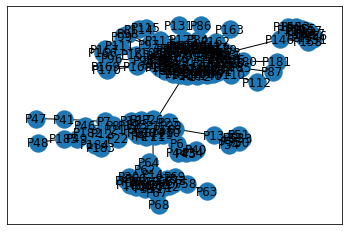

In [20]:
nx.draw_networkx(G_list[0])

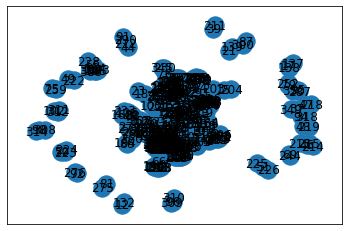

In [21]:
nx.draw_networkx(G_list[1])

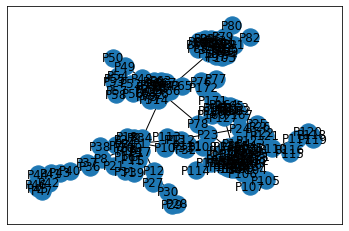

In [23]:
nx.draw_networkx(G_list[2])

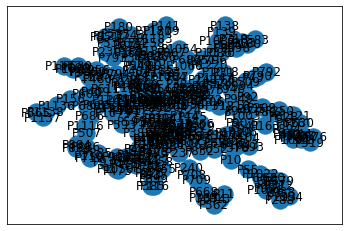

In [24]:
nx.draw_networkx(G_list[3])

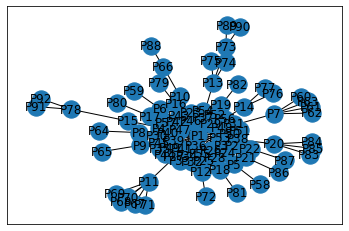

In [25]:
nx.draw_networkx(G_list[4])

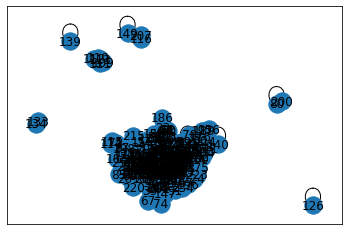

In [26]:
nx.draw_networkx(G_list[5])

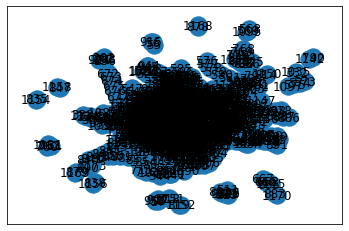

In [28]:
nx.draw_networkx(G_list[0])